In [1]:
import weave
from weave.ecosystem import shap

/Users/bryanbischof/.pyenv/versions/3.9.7/envs/weave2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = shap.ca_housing_dataset(1)
xy = shap.split_labels(dataset, 'MedHouseVal')
model = shap.xgboost_train(xy, {'learning_rate': 0.02})

explain_res = model.shap_explain(xy['X'])

In [3]:
explain_res.summary_plot()

# Compare to:

In [4]:
import shap
import typing
import xgboost
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [5]:
housing = fetch_california_housing(as_frame=True).frame

In [6]:
X = housing.drop("MedHouseVal", axis=1)
y = housing["MedHouseVal"]
data = {"X": X, "y": y}

In [7]:
model = xgboost.train(
    {'learning_rate': 0.02}, 
    xgboost.DMatrix(
        data["X"], 
        label=data["y"].to_numpy()
    ), 
    num_boost_round=100
)

In [8]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data['X'])

In [24]:
shap_values

array([[ 1.9977478 ,  0.1376926 , -0.00909909, ...,  0.02050224,
        -0.1406007 ,  0.10722467],
       [ 1.6970208 , -0.03647407, -0.0158269 , ...,  0.20584358,
        -0.10700833,  0.13706553],
       [ 1.4576269 ,  0.18270949,  0.0099352 , ..., -0.03920711,
        -0.2218564 ,  0.10061549],
       ...,
       [-0.701381  , -0.02537205, -0.05161539, ...,  0.09450056,
        -0.44076326,  0.05704165],
       [-0.7349992 , -0.02274171, -0.05182655, ...,  0.20167118,
        -0.4885632 ,  0.04765517],
       [-0.52730644, -0.03154086, -0.06031314, ..., -0.01319827,
        -0.4183639 ,  0.05760494]], dtype=float32)

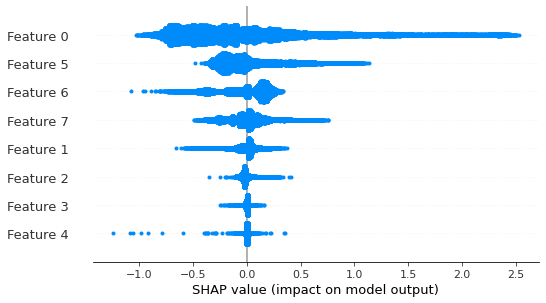

In [9]:
shap.summary_plot(shap_values)